In [2]:
import numpy as np
import bisect
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [15]:
def find_le(a,x):
    # Find rightmost value less than or equal to x
    i = bisect.bisect_right(a, x)
    if i:
        return i
    return 0

def compute_phi_t(t,sp_times_i,isp_low,T):
    # computing instantaneous phase (Eqn. 6 from paper)
    t_low, t_hi = 0,0
    if isp_low > 0:
        t_low = sp_times_i[isp_low-1]
        if isp_low + 1 < len(sp_times_i):
            t_hi = sp_times_i[isp_low]
        else:
            t_hi = T
    else:
        t_hi = sp_times_i[isp_low]
        t_low = 0.0
    return 2.*np.pi*((t-t_low)/(t_hi-t_low))

def synchrony_measure(csv_path,T=1000,t_res=0.1):
    """
    # Synchrony Measure
    ## Task:
    Implement the synchrony measure used in the paper for each population

    ## Input:
    Separate CSV file for each population with 2 columns; neuron index and spike time

    ## Algorithm
    1. Read CSV file into list of N (neurons in pop) lists each with corresponding spike times
    2. initialize S as array with dimension T/res
    3. For timestep t (with res of 0.1 since Izhikevich):
      - S(t) = 0
      - for each neuron i
        - calculate phi of i at t
        - for each neuron j not including i
          - calculate phi of j at t
          - Add to S(t)
      - append S(t) to S
    4. Average S
    5. Multiply by 2/N(N-1)
    6. Report result
    """
    data = np.genfromtxt(csv_path,delimiter=',')
    sp_times = [[]]
    n_neurons = int(data[-1,0])
    cur_i = 0
    for i in range(len(data)):
        if int(data[i,0]) != cur_i:
            sp_times.append([])
            cur_i = len(sp_times) - 1
        sp_times[cur_i].append(data[i,1])

    S = []
    for t in np.linspace(0,T,T/t_res):
        S_t = 0.0
        for i in range(n_neurons):
            isp_low_i = find_le(sp_times[i],t)
            phi_it = compute_phi_t(t,sp_times[i],isp_low_i,T)
            for j in range(n_neurons):
                if j == i:
                    continue
                else:
                    isp_low_j = find_le(sp_times[j],t)
                    phi_jt = compute_phi_t(t,sp_times[j],isp_low_j,T)
                    S_t += np.cos((phi_it-phi_jt)/2.0)**2
        S.append(S_t)
    return (2/(n_neurons*(n_neurons-1))) * np.mean(S)

N = 10
scores = []
for i_run in range(N):
    PATH = './spike_data/TCR_spikes_' + str(i_run) + '.csv'
    print("Starting run {}".format(i_run))
    score = synchrony_measure(PATH)
    print("Completed run {} with score {}".format(i_run, score))
    scores.append(score)
plt.scatter(list(range(1,N+1)),scores)
plt.show()

Starting run 0
Completed run 0 with score 1.243181217272095
Starting run 1
Completed run 1 with score 1.1953834879218113
Starting run 2
Completed run 2 with score 1.14257293273944
Starting run 3
Completed run 3 with score 1.061925672013732
Starting run 4
Completed run 4 with score 1.0809668817352385
Starting run 5
Completed run 5 with score 1.0680250997319252
Starting run 6
Completed run 6 with score 1.0789457965619873
Starting run 7
Completed run 7 with score 1.062004713815392
Starting run 8
Completed run 8 with score 1.1267452315440973
Starting run 9
Completed run 9 with score 1.0997195992332665


In [16]:
plt.scatter(list(range(1,11)),[1.24318,1.19538,1.14257,1.06192,1.080966,1.06802,1.078945,1.062004,1.126745,1.099719])
plt.show()

<IPython.core.display.Javascript object>


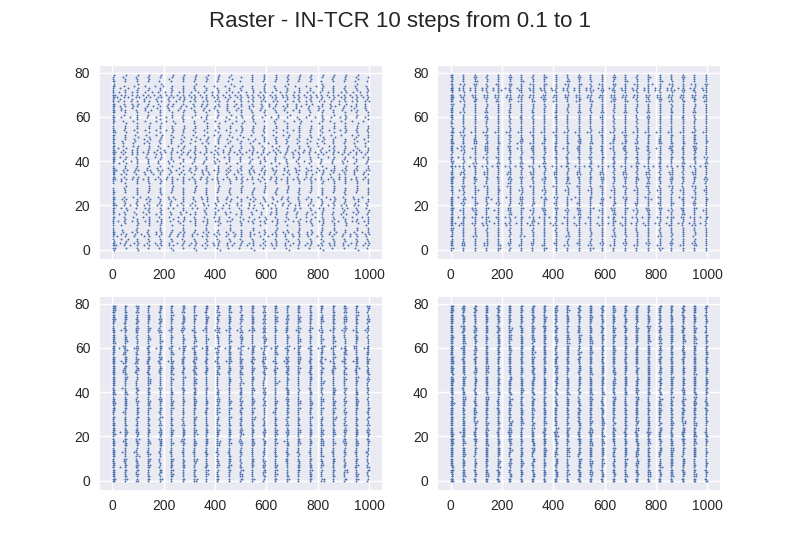

In [4]:
N = 4
fig, ax = plt.subplots(N//2,2)
fig.suptitle('Raster - IN-TCR 10 steps from 0.1 to 1', fontsize=16)
for i_run in range(N):
    PATH = './spike_data/TCR_spikes_' + str(i_run) + '.csv'
    data = np.genfromtxt(PATH,delimiter=',')
    i = int(i_run / 2)
    j = int(i_run % 2)
    ax[i,j].scatter(data[:,1],data[:,0],s=1)
plt.show()